# BASNet: Salient Object Detection

## [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ml4a/ml4a-guides/blob/ml4a.net/examples/models/BASNet.ipynb)

Outputs a mask of an image's salient objects (foreground). See the [original code](https://github.com/NathanUA/BASNet) and [paper](https://openaccess.thecvf.com/content_CVPR_2019/html/Qin_BASNet_Boundary-Aware_Salient_Object_Detection_CVPR_2019_paper.html).

## Set up ml4a and enable GPU

If you don't already have ml4a installed, or you are opening this in Colab, first enable GPU (`Runtime` > `Change runtime type`), then run the following cell to install ml4a and its dependencies.

In [ ]:
%tensorflow_version 1.x
!pip3 install --quiet ml4a

## Run BASNet

`basnet.get_foreground` takes an image and outputs a greyscale image of the input image's saliency map (`img_fg` below).

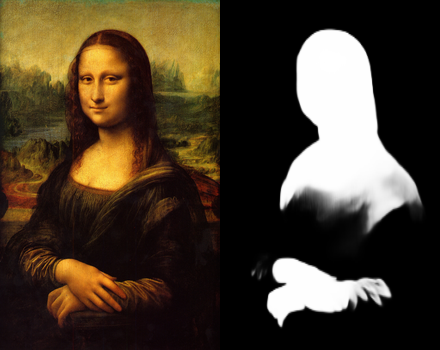

In [1]:
from ml4a.models import basnet
from ml4a import image

img = image.load_image('https://upload.wikimedia.org/wikipedia/commons/6/6a/Mona_Lisa.jpg', (220, 350))
foreground_mask = basnet.get_foreground(img)
image.display([img, foreground_mask])

You can use the outputted saliency map to mask out the background of the original image using `mask.mask_image`.

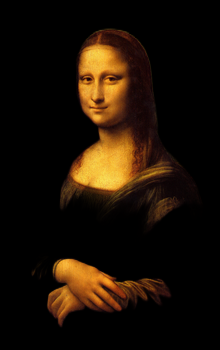

In [2]:
from ml4a import mask

img_masked = mask.mask_image(foreground_mask, img)
image.display(img_masked)

We can use the mask to composite the foreground with another background. We'll load a separate background image, and appy the opposite mask to it, then add the foreground to the background.

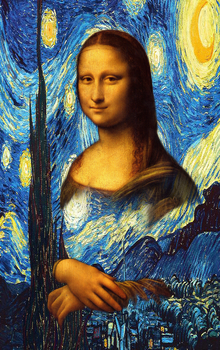

In [3]:
imgbg = image.load_image(image.starrynight(), image.get_size(img))
imgbg_masked = mask.mask_image(255-foreground_mask, imgbg)
img_combined = img_masked + imgbg_masked
image.display(img_combined)